In [6]:
# from keras import backend as K
from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Dense, Activation, Embedding, LSTM, GRU, SimpleRNN
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot, plot
from keras.preprocessing import sequence
import numpy as np
from IPython.display import SVG

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(13)
nb_epoch = 10

In [3]:
max_features = 20000

(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
maxlen=180
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

33218560/33213513 [==============================] - 820s   


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '1549' (I am process '1202')


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 47s - loss: 0.6869 - acc: 0.5453 - val_loss: 0.6805 - val_acc: 0.5536
Epoch 2/10
20000/20000 [==============================] - 46s - loss: 0.6486 - acc: 0.6260 - val_loss: 0.5969 - val_acc: 0.6750
Epoch 3/10
20000/20000 [==============================] - 57s - loss: 0.5760 - acc: 0.7034 - val_loss: 0.6733 - val_acc: 0.6124
Epoch 4/10
20000/20000 [==============================] - 54s - loss: 0.5387 - acc: 0.7351 - val_loss: 0.5455 - val_acc: 0.7434
Epoch 5/10
20000/20000 [==============================] - 48s - loss: 0.4538 - acc: 0.7943 - val_loss: 0.6728 - val_acc: 0.6616
Epoch 6/10
20000/20000 [==============================] - 49s - loss: 0.4008 - acc: 0.8212 - val_loss: 0.5896 - val_acc: 0.6806
Epoch 7/10
20000/20000 [==============================] - 45s - loss: 0.3555 - acc: 0.8470 - val_loss: 0.5365 - val_acc: 0.7494
Epoch 8/10
20000/20000 [==============================]

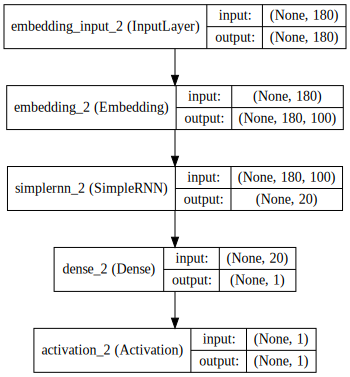

In [7]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

simple = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch,
                   validation_data=(X_test, y_test))

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 107s - loss: 0.6900 - acc: 0.5324 - val_loss: 0.6882 - val_acc: 0.5134
Epoch 2/10
20000/20000 [==============================] - 103s - loss: 0.6752 - acc: 0.5813 - val_loss: 0.6785 - val_acc: 0.5464
Epoch 3/10
20000/20000 [==============================] - 105s - loss: 0.6396 - acc: 0.6335 - val_loss: 0.5844 - val_acc: 0.7016
Epoch 4/10
20000/20000 [==============================] - 105s - loss: 0.5983 - acc: 0.6774 - val_loss: 0.6708 - val_acc: 0.6036
Epoch 5/10
20000/20000 [==============================] - 125s - loss: 0.5608 - acc: 0.7120 - val_loss: 0.7299 - val_acc: 0.6080
Epoch 6/10
20000/20000 [==============================] - 121s - loss: 0.5404 - acc: 0.7319 - val_loss: 0.5054 - val_acc: 0.7552
Epoch 7/10
20000/20000 [==============================] - 102s - loss: 0.5035 - acc: 0.7621 - val_loss: 0.4750 - val_acc: 0.7802
Epoch 8/10
20000/20000 [========================

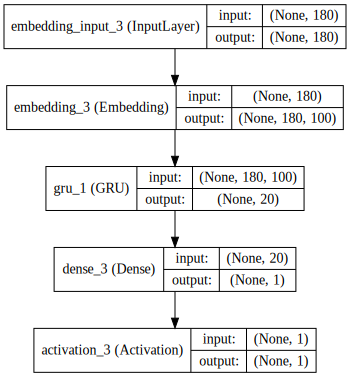

In [8]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(GRU(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

gru = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch,
                validation_data=(X_test, y_test))

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 144s - loss: 0.6723 - acc: 0.5881 - val_loss: 0.6888 - val_acc: 0.5286
Epoch 2/10
20000/20000 [==============================] - 135s - loss: 0.6174 - acc: 0.6680 - val_loss: 0.6885 - val_acc: 0.5774
Epoch 3/10
20000/20000 [==============================] - 143s - loss: 0.5696 - acc: 0.7128 - val_loss: 0.5340 - val_acc: 0.7312
Epoch 4/10
20000/20000 [==============================] - 125s - loss: 0.5337 - acc: 0.7399 - val_loss: 0.5450 - val_acc: 0.7470
Epoch 5/10
20000/20000 [==============================] - 119s - loss: 0.5106 - acc: 0.7555 - val_loss: 0.4863 - val_acc: 0.7740
Epoch 6/10
20000/20000 [==============================] - 120s - loss: 0.4845 - acc: 0.7763 - val_loss: 0.4444 - val_acc: 0.8004
Epoch 7/10
20000/20000 [==============================] - 119s - loss: 0.4500 - acc: 0.7997 - val_loss: 0.4106 - val_acc: 0.8208
Epoch 8/10
20000/20000 [========================

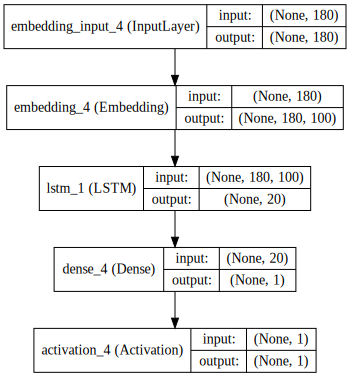

In [9]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

lstm = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch,
                 validation_data=(X_test, y_test))

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 56s - loss: 0.6869 - acc: 0.5407 - val_loss: 0.6783 - val_acc: 0.5674
Epoch 2/10
20000/20000 [==============================] - 55s - loss: 0.6558 - acc: 0.6021 - val_loss: 0.6472 - val_acc: 0.6166
Epoch 3/10
20000/20000 [==============================] - 61s - loss: 0.6000 - acc: 0.6719 - val_loss: 0.5834 - val_acc: 0.6968
Epoch 4/10
20000/20000 [==============================] - 70s - loss: 0.4953 - acc: 0.7590 - val_loss: 0.4837 - val_acc: 0.7834
Epoch 5/10
20000/20000 [==============================] - 61s - loss: 0.4178 - acc: 0.8130 - val_loss: 0.5507 - val_acc: 0.7238
Epoch 6/10
20000/20000 [==============================] - 57s - loss: 0.3821 - acc: 0.8319 - val_loss: 0.6475 - val_acc: 0.7052
Epoch 7/10
20000/20000 [==============================] - 56s - loss: 0.3167 - acc: 0.8690 - val_loss: 0.5605 - val_acc: 0.7686
Epoch 8/10
20000/20000 [==============================]

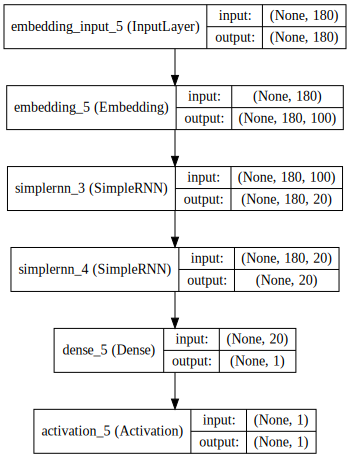

In [10]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(SimpleRNN(20, return_sequences=True))
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

simple_stack = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch,
                         validation_data=(X_test, y_test))

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

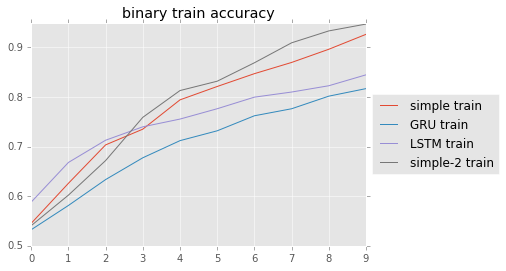

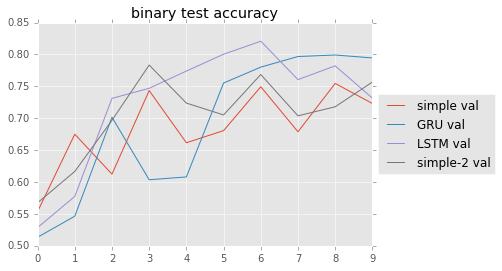

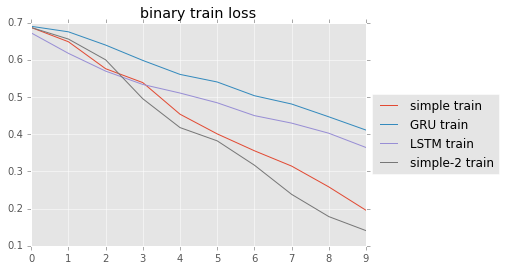

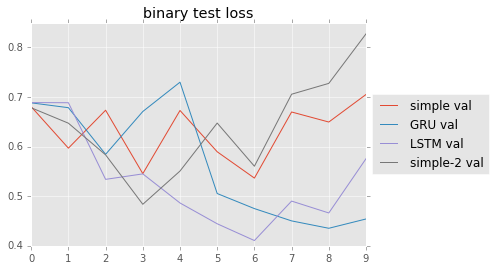

In [16]:
x = range(nb_epoch)
plt.plot(x, simple.history['acc'], label="simple train")
plt.plot(x, gru.history['acc'], label="GRU train")
plt.plot(x, lstm.history['acc'], label="LSTM train")
plt.plot(x, simple_stack.history['acc'], label="simple-2 train")

plt.title("binary train accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, simple.history['val_acc'], label="simple val")
plt.plot(x, gru.history['val_acc'], label="GRU val")
plt.plot(x, lstm.history['val_acc'], label="LSTM val")
plt.plot(x, simple_stack.history['val_acc'], label="simple-2 val")

plt.title("binary test accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, simple.history['loss'], label="simple train")
plt.plot(x, gru.history['loss'], label="GRU train")
plt.plot(x, lstm.history['loss'], label="LSTM train")
plt.plot(x, simple_stack.history['loss'], label="simple-2 train")
plt.title("binary train loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
                        
plt.plot(x, simple.history['val_loss'], label="simple val")
plt.plot(x, gru.history['val_loss'], label="GRU val")
plt.plot(x, lstm.history['val_loss'], label="LSTM val")
plt.plot(x, simple_stack.history['val_loss'], label="simple-2 val")
plt.title("binary test loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()